![banner](./img/smc_gis_28_banner.png)

# Lesson 03 - Functions, Control Flow, Shapes

## Python Functions

Python functions are blocks of code that that you can run whenever you want by "calling" or "invoking" them with `()`.  

The keyword `def` is used to declare a function. 

```
def function_name():
  your_code
```

In [4]:
def hello_function(): 
    print('Hello, my name is Javier')

In [5]:
hello_function()

Hello, my name is Javier


#### This function isn't very flexible, it does the same thing every time.

Add some parameters 
> Generally when people say parameter/argument they mean the same thing, but the main difference between them is that the **parameter is what is declared in the function**, while an **argument is what is passed through when calling the function**. Source: https://stackoverflow.com/questions/47169033/parameter-vs-argument-python

In [6]:
def hello_name_function(name):
    print(f'Hello, my name is {name}!')

In [7]:
hello_name_function('Joe')

Hello, my name is Joe!


#### Seting Default Values with `=` 

In [8]:
def hello_name_interest(name, thing_i_like='Swimming'):
    print(f"Hello, my name is {name}, I like {thing_i_like}!")

In [9]:
hello_name_interest('Prof. Jing')

Hello, my name is Prof. Jing, I like Swimming!


In [10]:
hello_name_interest('Javier','Hiking')

Hello, my name is Javier, I like Hiking!


#### Named arguments

In [11]:
hello_name_interest(thing_i_like='Pizza', name='Donatello')

Hello, my name is Donatello, I like Pizza!


## Imporant:  `Returning` vs `Side Effects` (like just printing)

This function looks like it's returning something, becuase jupyter displays printed strings to the screen.  But you can't capture anything with an assignment.

In [204]:
returned_value = hello_name_interest(thing_i_like='Pizza', name='Donatello')

Hello, my name is Donatello, I like Pizza!


In [205]:
returned_value

In [206]:
type(returned_value)

NoneType

In [207]:
def return_a_greeting_string(name, thing_i_like='Swimming'):
    greeting_string = f"Hello, my name is {name}, I like {thing_i_like}!"
    return greeting_string

In [208]:
ok_really_a_returned_value = return_a_greeting_string(thing_i_like='Pizza', name='Donatello')

In [209]:
ok_really_a_returned_value

'Hello, my name is Donatello, I like Pizza!'

In [210]:
type(ok_really_a_returned_value)

str

**This will matter a lot more later.**

## Coders Are All About That DRY life.

- DRY = Don't Repeat Yourself
- Wrapping code up into functions keeps your life DRY

Remember this code?
```py
import matplotlib.pyplot as plt

projections = ["aitoff", "hammer", "lambert", "mollweide"]

for projection in projections:
    plt.figure(figsize=(10, 10))
    plt.subplot(projection=projection)
    plt.title(projection.title())
    plt.grid(True)

    plt.savefig(f'img/projections/{projection}.png')  
    plt.savefig(f'pdf/{projection}_projection.pdf')  

    plt.show()
```

In [12]:
! mkdir -p img/projections; mkdir pdf

mkdir: cannot create directory ‘pdf’: File exists


In [13]:
!pwd

/home/javier/learn/gis/py/pratt/pratt-savi-810-2020-03-lesson_03/completed


If you wanted to save images of different sizes, you might do something like this:

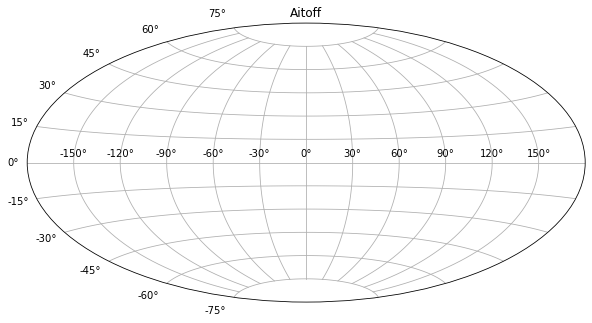

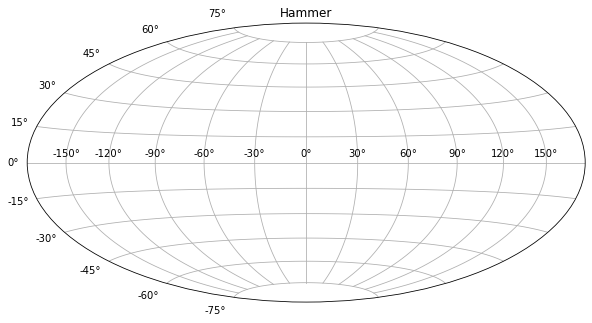

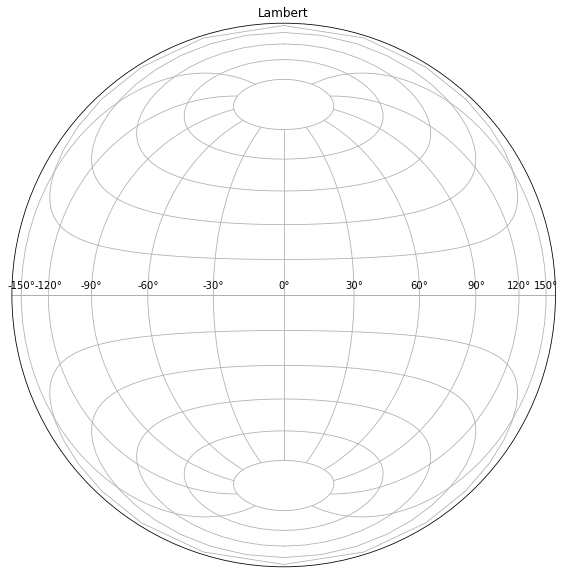

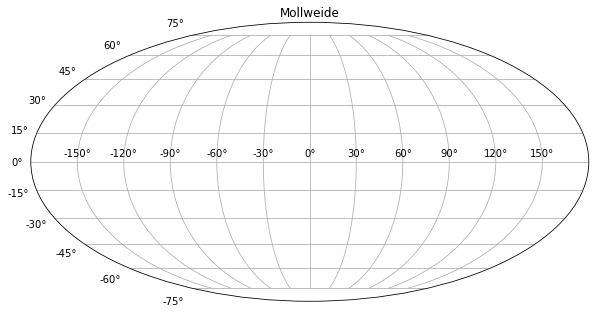

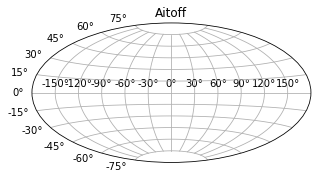

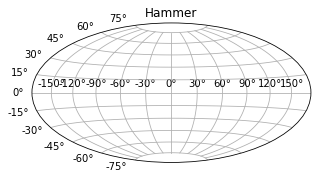

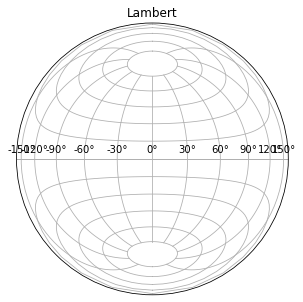

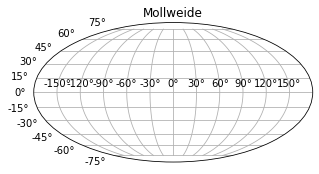

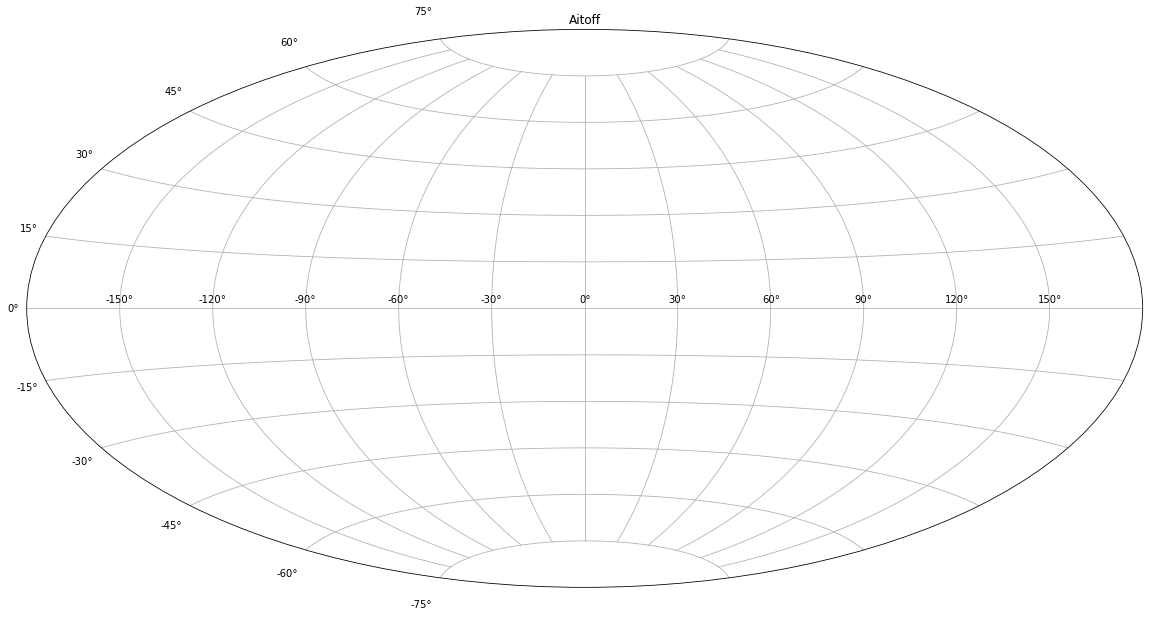

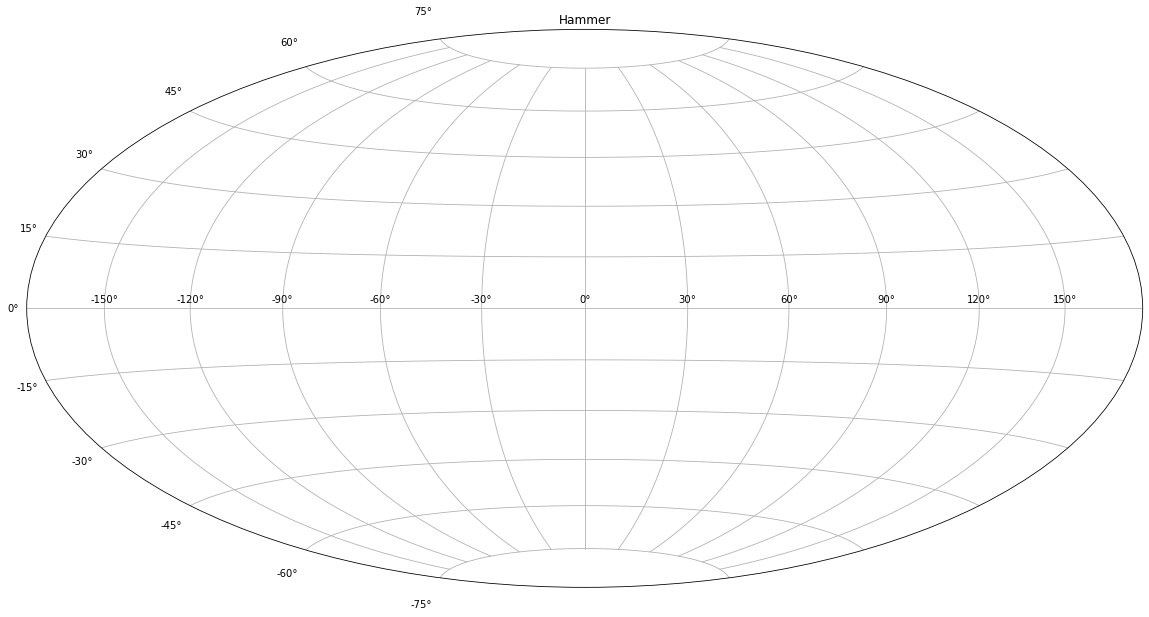

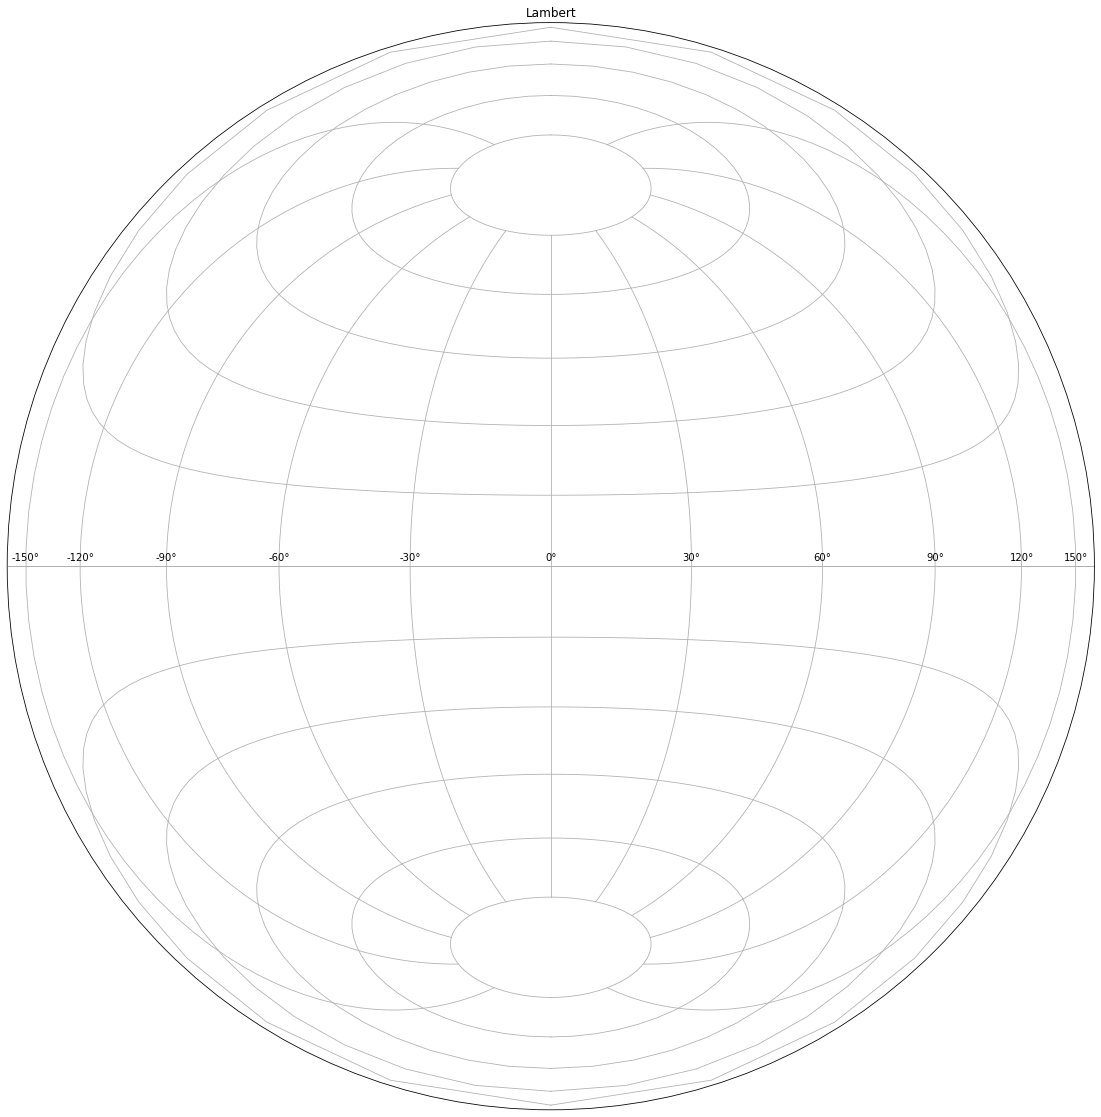

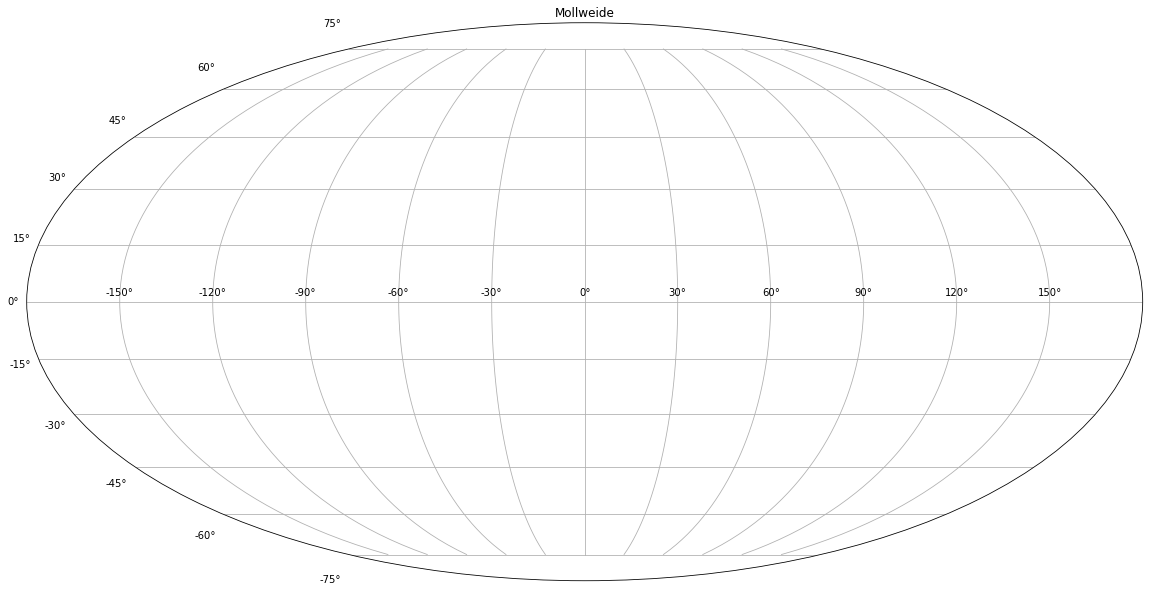

In [14]:
import matplotlib.pyplot as plt

projections = ["aitoff", "hammer", "lambert", "mollweide"]

for projection in projections:
    plt.figure(figsize=(10, 10))
    plt.subplot(projection=projection)
    plt.title(projection.title())
    plt.grid(True)

    plt.savefig(f'img/projections/{projection}_10x10.png')  
    plt.show()
    
for projection in projections:
    plt.figure(figsize=(5, 5))
    plt.subplot(projection=projection)
    plt.title(projection.title())
    plt.grid(True)

    plt.savefig(f'img/projections/{projection}_5x5.png')  
    plt.show()
    
for projection in projections:
    plt.figure(figsize=(20, 20))
    plt.subplot(projection=projection)
    plt.title(projection.title())
    plt.grid(True)

    plt.savefig(f'img/projections/{projection}_5x5.png')  
    plt.show()

# Let's DRY that up!

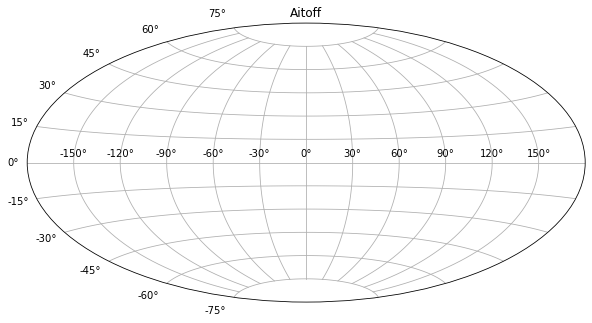

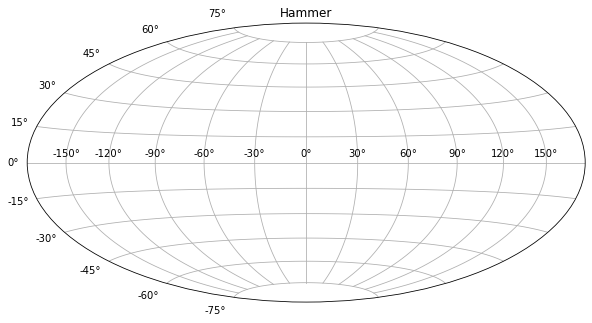

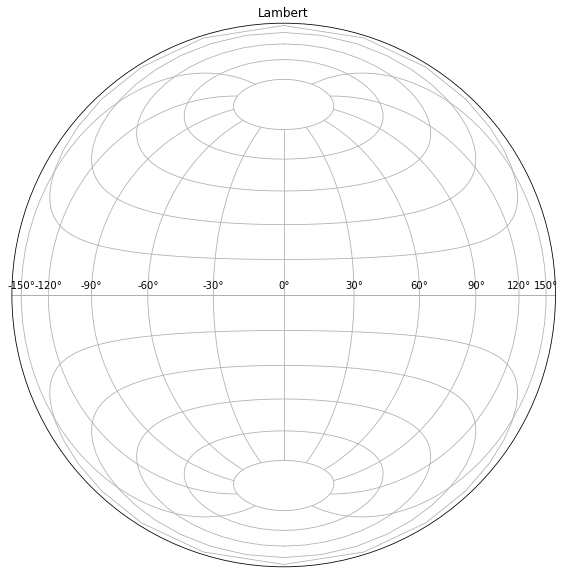

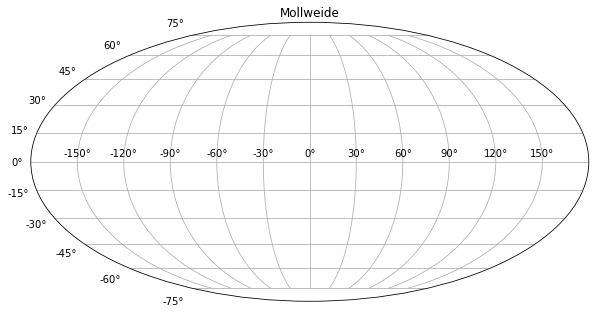

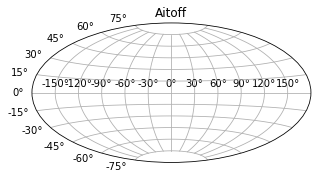

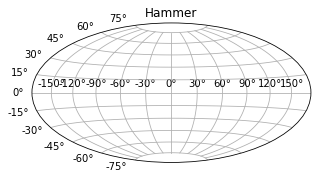

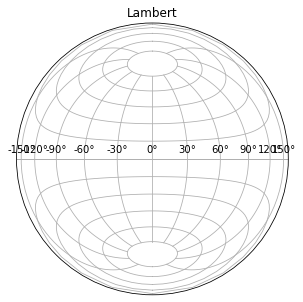

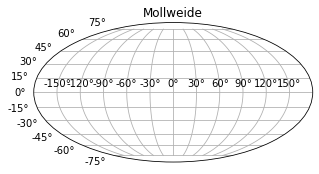

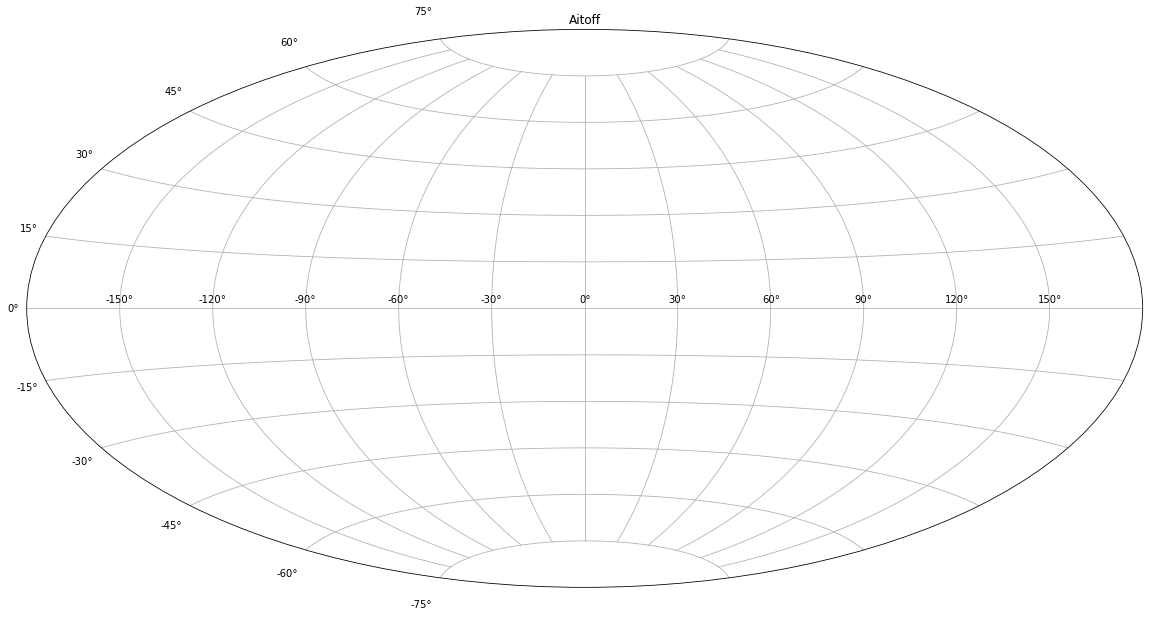

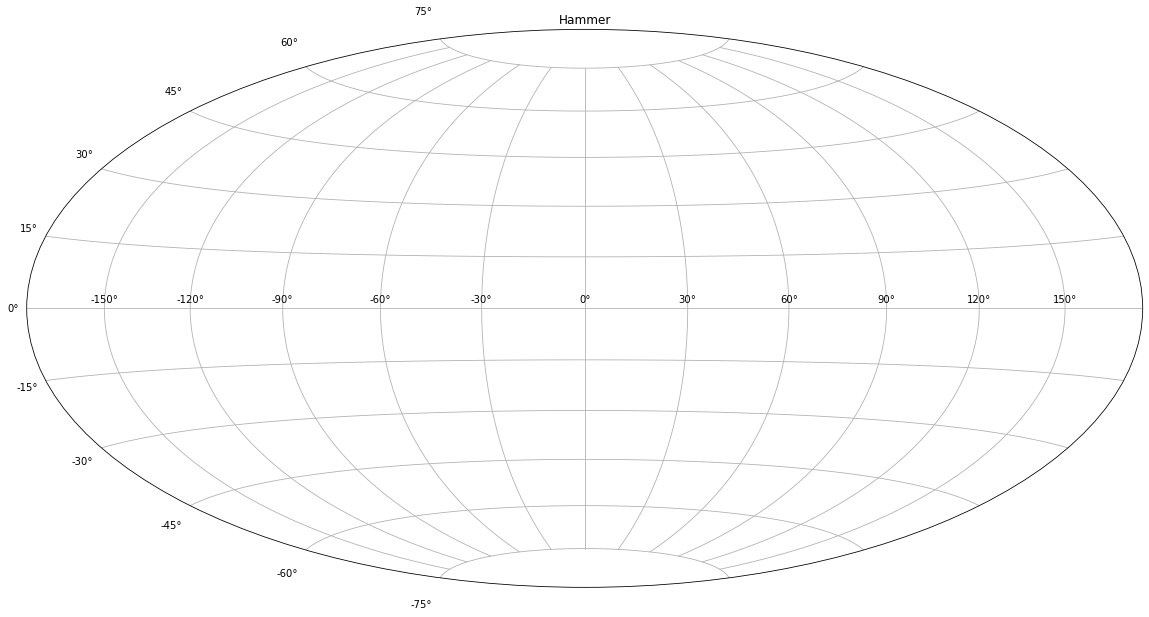

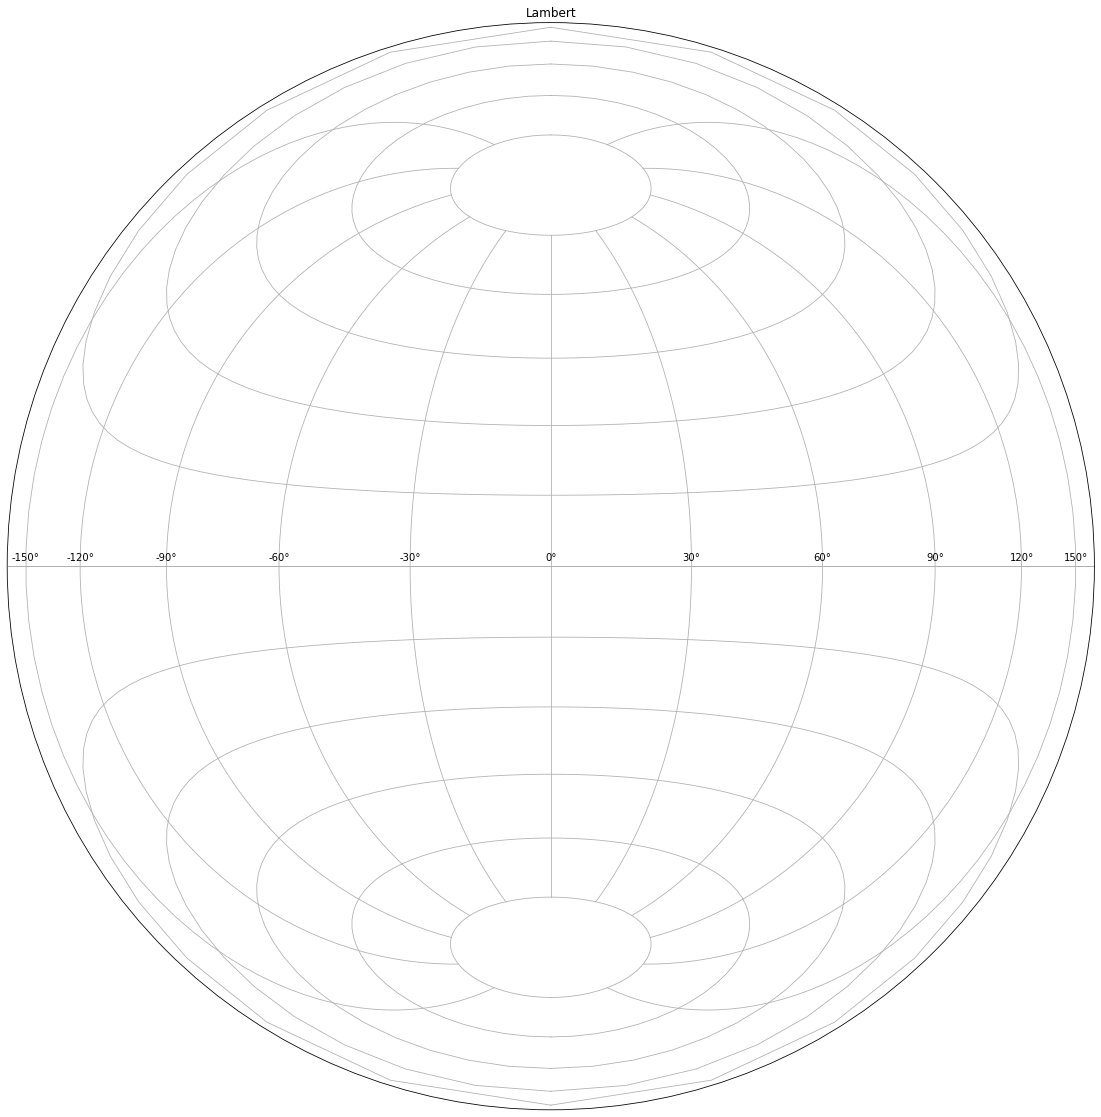

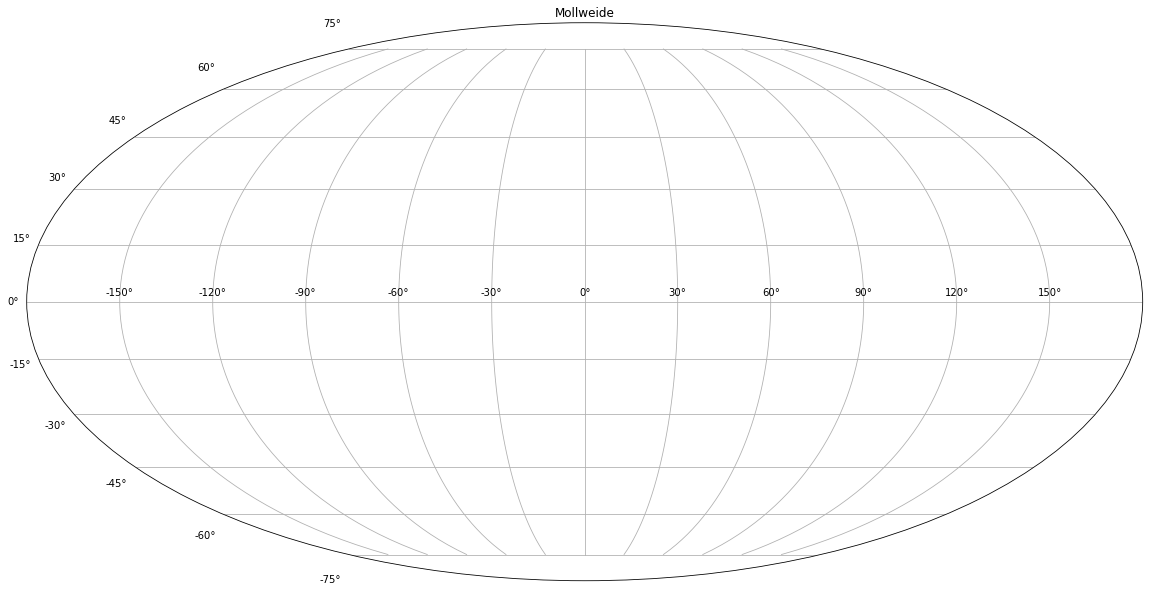

In [16]:
import matplotlib.pyplot as plt

projections = ["aitoff", "hammer", "lambert", "mollweide"]
side_sizes = [10,5,20]

def show_and_save_projection(projection,side_size):
    plt.figure(figsize=(side_size, side_size))
    plt.subplot(projection=projection)
    plt.title(projection.title())
    plt.grid(True)

    plt.savefig(f'img/projections/{projection}_{side_size}x{side_size}.png')  
    plt.show()

    
for side_size in side_sizes:
    for projection in projections:
        show_and_save_projection(projection, side_size)

### Assignment  Make the function more flexible and iterate through Dictionary

```
dimensions = [{'height':10,'width':10}, {'height':5,'width':5}, {'height':20,'width':20}]

def show_and_save_projection_any_size(projection, height, width):
    your_code_here # mostly copy paste from above

for dimension in dimensions:
    for projection in projections:
        show_and_save_projection_any_size(projection, height, width)
        
```

This may be helpful to figure out how to use `figsize`
https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.figure.html

In [17]:
# desired dimensions and projections
dimensions = [{'height':10,'width':5}, {'height':15,'width':10}, {'height':8,'width':8}]
projections = ["aitoff", "hammer", "lambert", "mollweide"]

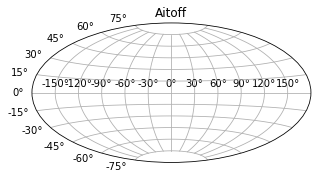

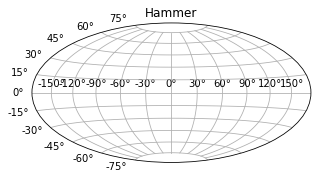

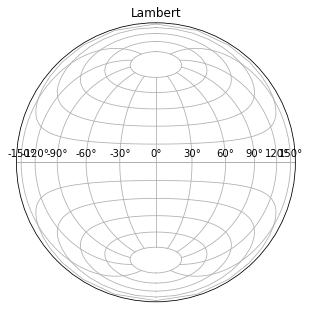

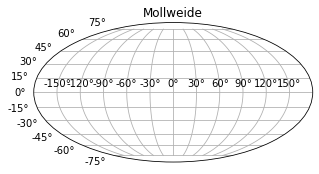

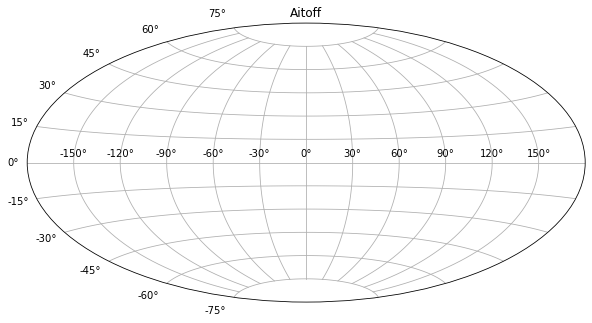

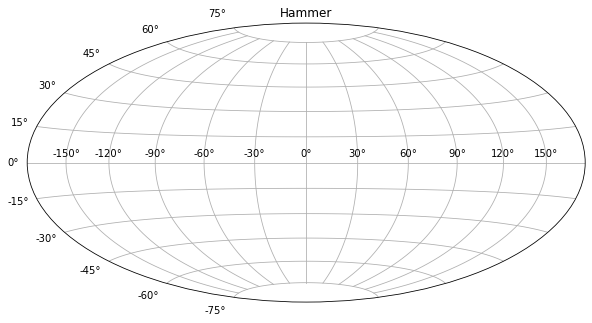

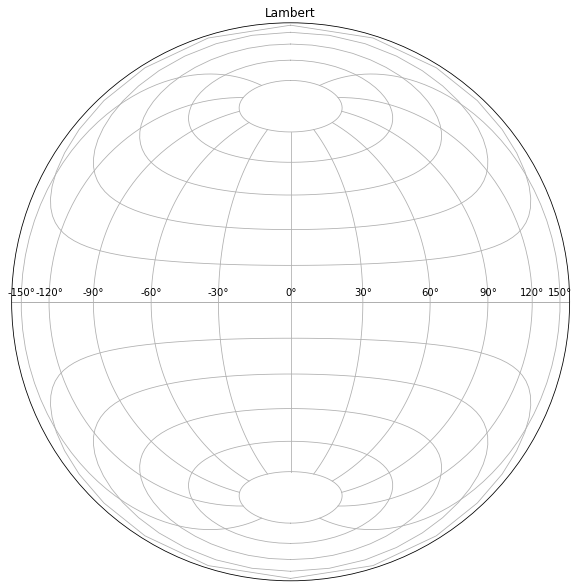

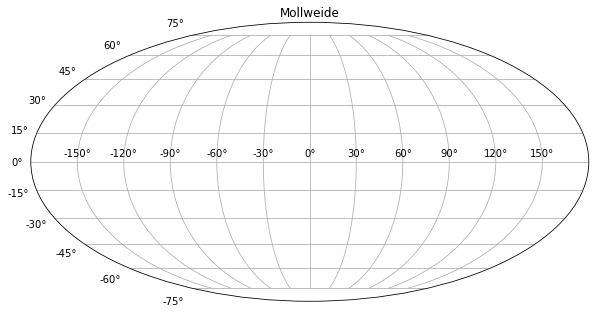

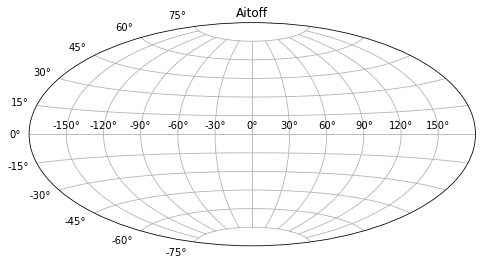

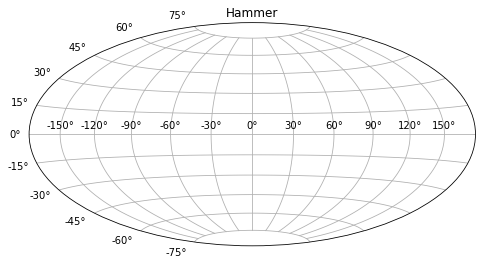

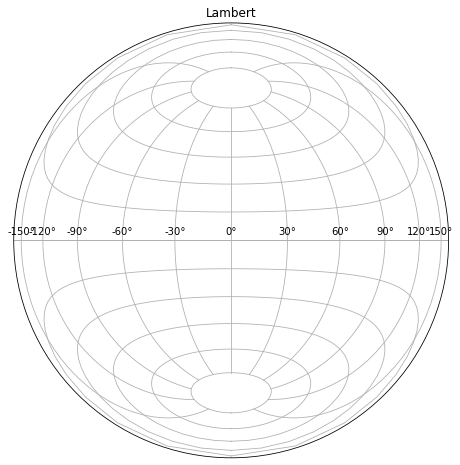

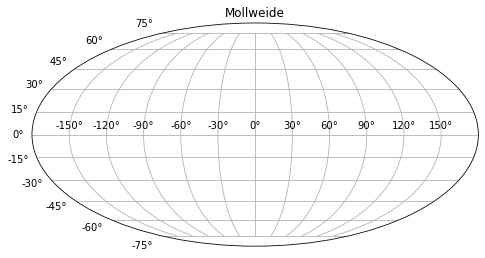

In [18]:
def show_and_save_projection_any_size(projection,width, height):
    plt.figure(figsize=(width, height))
    plt.subplot(projection=projection)
    plt.title(projection.title())
    plt.grid(True)

    plt.savefig(f'img/projections/{projection}_{width}x{height}.png')  
    plt.show()

    
for dimension in dimensions:
    for projection in projections:
        show_and_save_projection_any_size(projection, dimension['width'],dimension['height'])

## Control Flow - `if` / `elif` / `else`

The National Academies of Science, Engineering and Medicine recommends the following for daily fluid intake:

 - 125 ounces (3.7 liters) for men.
 - 91 ounces (2.7 liters) for women.

source: https://health.clevelandclinic.org/how-much-water-do-you-need-daily/

Let's code something up for men:

In [56]:
water_today = 12

In [57]:
if water_today >= 150:
    print("OK, maybe we're getting a little too much water today")
elif water_today >= 125:
    print("Nice, You've met your 125 ounce requirement")
elif water_today >= 100:
    print("OK, You're almost there! {125-water_today} ounces to go!")
elif water_today >= 62.5:
    print(f"You've passed the half way mark! {125-water_today} ounces to go!")
else:
    print(f"You need more Water. {125-water_today} ounces more!")

You need more Water. 113 ounces more!


In [59]:
def mens_water_test(water_today):
    if water_today >= 150:
        print("OK, maybe we're getting a little too much water today")
    elif water_today >= 125:
        print("Nice, You've met your 125 ounce requirement")
    elif water_today >= 100:
        print("OK, You're almost there! {125-water_today} ounces to go!")
    elif water_today >= 62.5:
        print(f"You've passed the half way mark! {125-water_today} ounces to go!")
    else:
        print(f"You need more Water. {125-water_today} ounces more!")

In [60]:
mens_water_test(87)

You've passed the half way mark! 38 ounces to go!


### Assignment
The above breaks are at 1.2x, 1x, 0.8x, and 0.5x the required amount of water for males.
Write a general function `water_test` that will take in if your have `male` or `female` water requirements and how much water you've had today, and print to the screen a message like the above.

In [64]:
def water_test(sex='male',water_today=0):
    if sex == 'male':
        requirement = 125
    else:
        requirement = 91
    
    if water_today >= 1.2 * requirement:
        print("OK, maybe we're getting a little too much water today")
    elif water_today >= requirement:
        print(f"Nice, You've met your {requirement} ounce requirement")
    elif water_today >= 0.8 * requirement:
        print("OK, You're almost there! {requirement-water_today} ounces to go!")
    elif water_today >= 0.5 * requirement:
        print(f"You've passed the half way mark! {requirement-water_today} ounces to go!")
    else:
        print(f"You need more Water. {requirement-water_today} ounces more!")


In [66]:
water_test('male',70)

You've passed the half way mark! 55 ounces to go!


In [67]:
water_test('female',70)

You've passed the half way mark! 21 ounces to go!


## Shapes (i.e. Geometries)

Here's a distinction important in GIS & Computing which you'll run into someday when you work with PostGIS:

- **Geometry**: assumes all of your data lives on a Cartesian plane (like a map projection);
- **Geography**: assumes that your data is made up of points on the earth’s surface, as specified by latitudes and longitudes.

*Source: https://medium.com/coord/postgis-performance-showdown-geometry-vs-geography-ec99967da4f0*


**We'll work with geometries here using the python package shapely: https://pypi.org/project/Shapely/**

### Points

In [19]:
from shapely.geometry import Point
import matplotlib.pyplot as plt

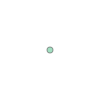

In [27]:
p1 = Point(0,0)
p1

In [28]:
type(p1)

shapely.geometry.point.Point

In [29]:
p1.x

0.0

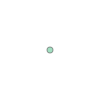

In [30]:
p2 = Point(5,10)
p2

In [31]:
p2.x

5.0

In [32]:
p2.xy

(array('d', [5.0]), array('d', [10.0]))

In [33]:
p1x, p1y = p1.xy
p2x, p2y = p2.xy

In [34]:
p2y

array('d', [10.0])

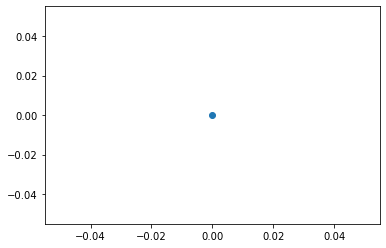

In [36]:
plt.scatter(p1x, p1y)

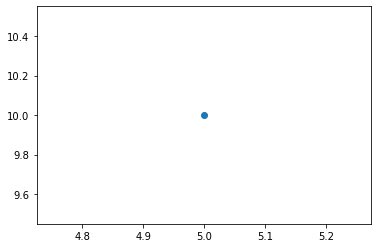

In [37]:
plt.scatter(p2x, p2y)

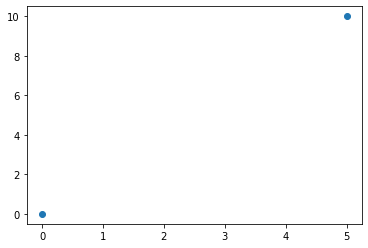

In [38]:
plt.scatter([p1x,p2x],[p1y,p2y])

### Lines - (LineString)

In [39]:
from shapely.geometry import LineString

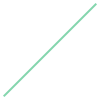

In [40]:
line = LineString([(0, 0), (5, 5)])
line

In [82]:
line1 = LineString([(0, 0), (2, 4), (4,6),(6,6)])
line2 = LineString([(0, 0), (2, 2), (4,6),(2,6)])

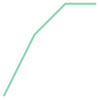

In [83]:
line1

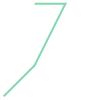

In [84]:
line2

In [92]:
line1.xy

(array('d', [0.0, 2.0, 4.0, 6.0]), array('d', [0.0, 4.0, 6.0, 6.0]))

In [93]:
line1.xy[0]

array('d', [0.0, 2.0, 4.0, 6.0])

What are these `d`'s ?!

- they signify that the array is of type `double`
- Lots of people conflate arrays and lists.  They're different.  These are arrays.

https://docs.python.org/3/library/array.html

In [94]:
type(line1.xy[0])

array.array

**You could make your own array this way....**

In [111]:
import array as arr
magic_numbers_array = arr.array('d',[3.141,2.718])

In [112]:
magic_numbers_array

array('d', [3.141, 2.718])

In [113]:
type(magic_numbers_array)

array.array

**...  but, for GIS work, you basically will never need to and you can just get away with only ever using lists.**

The whole point of showing you that is to show that the `d` isn't data, it's just info that's printed to the screen for us Humans to know the type of thing in the array.

Now, let me use a bit of python [iterable unpacking](https://www.geeksforgeeks.org/packing-and-unpacking-arguments-in-python/) to save time and plot these two lines at the same time:  

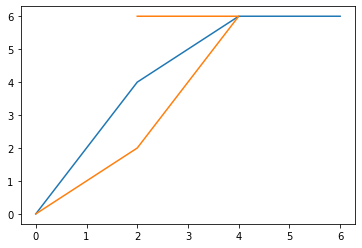

In [86]:
plt.plot(*line1.xy);
plt.plot(*line2.xy);

### Intersections

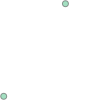

In [150]:
intersecting_points = line1.intersection(line2)  # geoprocessing operation
intersecting_points

In [151]:
type(intersecting_points)

shapely.geometry.multipoint.MultiPoint

In [185]:
# xs = [geom.x for geom in intersecting_points.geoms]
# ys = [geom.y for geom in intersecting_points.geoms]

In [191]:
# plt.scatter(xs,ys);

In [192]:
# plt.plot(*line1.xy);
# plt.plot(*line2.xy);
# plt.scatter(xs,ys,marker='x',c='black');

#### MultiPoint 

In [193]:
from shapely.geometry import MultiPoint

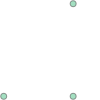

In [196]:
multi_pt1 = MultiPoint([(0, 0), (3, 0), (3, 4)])
multi_pt1

#### Convex hulls  

A fancy way of saying: "if those points were nails hammered into a board, and you put a rubber band around them, this is what you'd get".

This will come back in another lesson later...

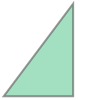

In [198]:
multi_pt1.convex_hull 

### Polygons

In [116]:
from shapely.geometry import Polygon

In [136]:
poly1 = Polygon([[1, 1], [-1, 3], [5, 3], [3, 1]])
poly2 = Polygon([[0, 0], [3, 2], [4, 4], [4, 0]])

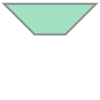

In [137]:
poly1

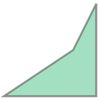

In [138]:
poly2

In [139]:
poly1.area

8.0

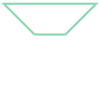

In [148]:
poly1.exterior

In [141]:
poly1.exterior.xy

(array('d', [1.0, -1.0, 5.0, 3.0, 1.0]), array('d', [1.0, 3.0, 3.0, 1.0, 1.0]))

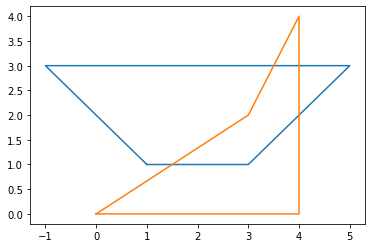

In [142]:
plt.plot(*poly1.exterior.xy);
plt.plot(*poly2.exterior.xy);

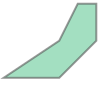

In [143]:
poly3 = poly1.intersection(poly2)
poly3

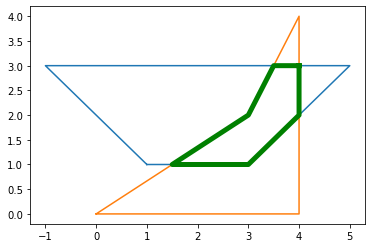

In [224]:
plt.plot(*poly1.exterior.xy);
plt.plot(*poly2.exterior.xy);
plt.plot(*poly3.exterior.xy,linewidth=5,color='green');

Assignment:  Try to interset two triangles to make a hexagon (highlight it like the bold green shape above) 

The shape doesn't have to be perfect.

Name one triangle `poly4`, the other `poly5` and the resulting hexagon `poly6`

![polysics](./img/polysics.jpg)


In [230]:
#example Solution
poly4 = Polygon([[0, 0], [6, 0], [3, 3]])
poly5 = Polygon([[0, 2], [6, 2], [3, -1]])

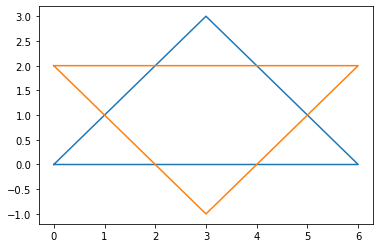

In [216]:
plt.plot(*poly4.exterior.xy);
plt.plot(*poly5.exterior.xy);

In [219]:
poly6 = poly4.intersection(poly5)

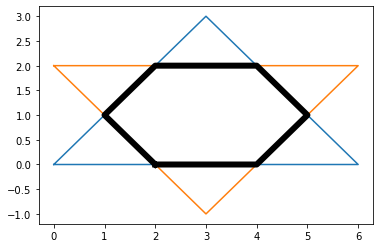

In [229]:
plt.plot(*poly4.exterior.xy);
plt.plot(*poly5.exterior.xy);
plt.plot(*poly6.exterior.xy,linewidth=6,color='black');